# IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import pi
import string
import re
import tensorflow as tf
from surprise import Dataset, Reader
from sklearn.model_selection import train_test_split
from surprise import KNNBasic
from surprise.accuracy import rmse
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse
import researchpy as rp
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import warnings
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import squarify
import math
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
# Read the Excel file into a DataFrame
data = pd.read_excel("C:/Users/Administrator/Desktop/Copy of Job Recommendation System (1)(3).xlsx")

# display the dataframe
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,user ID,Name,Age,Gender,Title,Minimum Qualifications,Academic Background,Field of Study,Skills,Industry Interest,Job Type Interest,Location Interest,Salary Expectation (in USD),desired company
0,986206,John Smith,28,male,Google Cloud Program Manager,BA/BS degree or equivalent practical experienc...,Bachelor's degree,Computer Science,"Java, Python, Data Structures",Technology,Full-time,New York,65000,apple
1,769632,Jane Doe,42,Female,"Supplier Development Engineer (SDE), Cable/Con...",BS degree in an Engineering discipline or equi...,Master's degree,Business,"Finance, Accounting, Microsoft Excel",Finance,Contract,London,85000,samsung
2,981314,David Lee,35,Male,"Data Analyst, Product and Tools Operations, Go...","Bachelorâ€™s degree in Business, Economics, St...","bachelor""s degree",NaN,"Sales, Customer Service, Communication",Retail,Part-time,Chicago,30000,google
3,962892,Sarah Johnson,27,Female,"Developer Advocate, Partner Engineering",BA/BS degree in Computer Science or equivalent...,Associate's degree,Nursing,"Patient Care, Medical Terminology",Healthcare,Full-time,Los Angeles,45000,merck & co
4,967782,Michael Williams,46,Male,"Program Manager, Audio Visual (AV) Deployments",BA/BS degree or equivalent practical experienc...,Bachelor's degree,Marketing,"Digital Marketing, Social Media",Marketing,Freelance,Toronto,70000,ABB


In [2]:
data.shape

(999, 14)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   user ID                      999 non-null    int64 
 1   Name                         999 non-null    object
 2   Age                          999 non-null    int64 
 3   Gender                       999 non-null    object
 4   Title                        999 non-null    object
 5   Minimum Qualifications       999 non-null    object
 6   Academic Background          999 non-null    object
 7   Field of Study               963 non-null    object
 8   Skills                       999 non-null    object
 9   Industry Interest            999 non-null    object
 10  Job Type Interest            999 non-null    object
 11  Location Interest            999 non-null    object
 12  Salary Expectation (in USD)  999 non-null    int64 
 13  desired company              999 no

# DESCRIPTIVE STATISTICS

In [4]:
# Get descriptive statistics
descriptive_stats = data.describe()

# Display the descriptive statistics
print(descriptive_stats)

             user ID         Age  Salary Expectation (in USD)
count     999.000000  999.000000                   999.000000
mean   931435.157157   30.625626                 65385.385385
std    158544.732526    9.187644                 28965.576740
min       382.000000    0.000000                 20000.000000
25%    962133.000000   24.000000                 45000.000000
50%    972695.000000   30.000000                 65000.000000
75%    983960.500000   36.000000                 85000.000000
max    998456.000000   64.000000                150000.000000


# CHECKING FOR MISSING VALUES

In [5]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

user ID                         0
Name                            0
Age                             0
Gender                          0
Title                           0
Minimum Qualifications          0
Academic Background             0
Field of Study                 36
Skills                          0
Industry Interest               0
Job Type Interest               0
Location Interest               0
Salary Expectation (in USD)     0
desired company                 0
dtype: int64


In [6]:
# Impute missing values for numerical columns with the mean
numerical_columns = data.select_dtypes(include='number').columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Impute missing values for categorical columns with the most frequent value
categorical_columns = data.select_dtypes(include='object').columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [7]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

user ID                        0
Name                           0
Age                            0
Gender                         0
Title                          0
Minimum Qualifications         0
Academic Background            0
Field of Study                 0
Skills                         0
Industry Interest              0
Job Type Interest              0
Location Interest              0
Salary Expectation (in USD)    0
desired company                0
dtype: int64


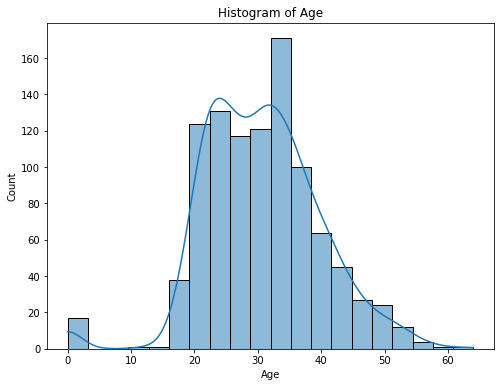

In [8]:
# Plot histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


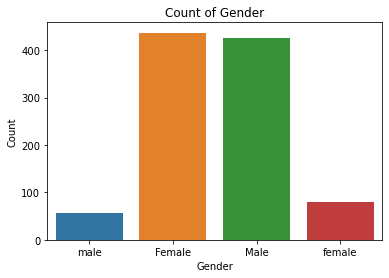

In [9]:
# Plot count of Gender
plt.figure(figsize=(6, 4))
sns.countplot(data['Gender'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Gender')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


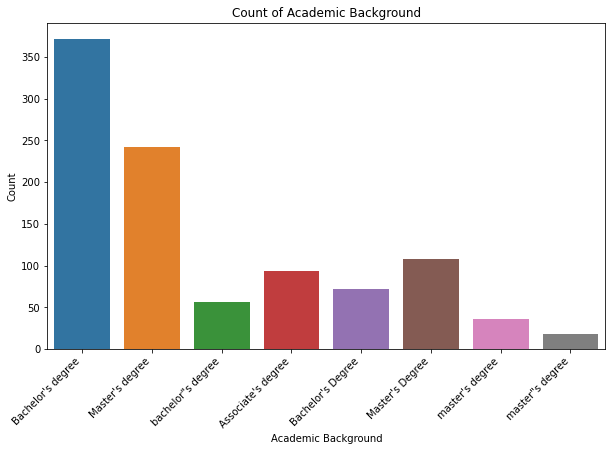

In [10]:
# Plot count of Academic Background
plt.figure(figsize=(10, 6))
sns.countplot(data['Academic Background'])
plt.xlabel('Academic Background')
plt.ylabel('Count')
plt.title('Count of Academic Background')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


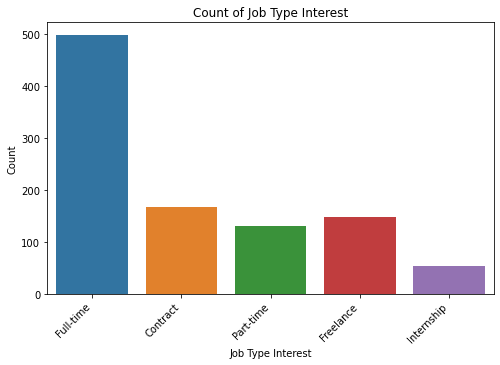

In [11]:
# Plot count of Job Type Interest
plt.figure(figsize=(8, 5))
sns.countplot(data['Job Type Interest'])
plt.xlabel('Job Type Interest')
plt.ylabel('Count')
plt.title('Count of Job Type Interest')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


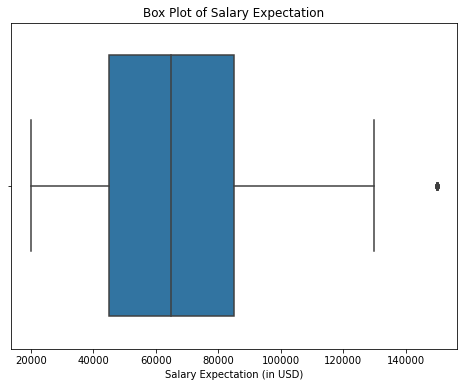

In [12]:
# Plot box plot of Salary Expectation
plt.figure(figsize=(8, 6))
sns.boxplot(data['Salary Expectation (in USD)'])
plt.xlabel('Salary Expectation (in USD)')
plt.title('Box Plot of Salary Expectation')
plt.show()

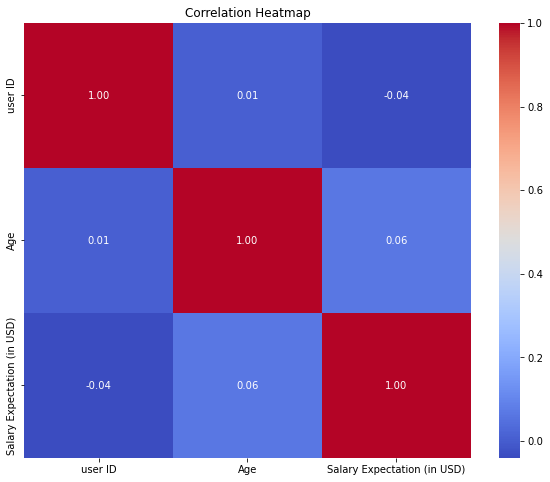

In [13]:
# Plot correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


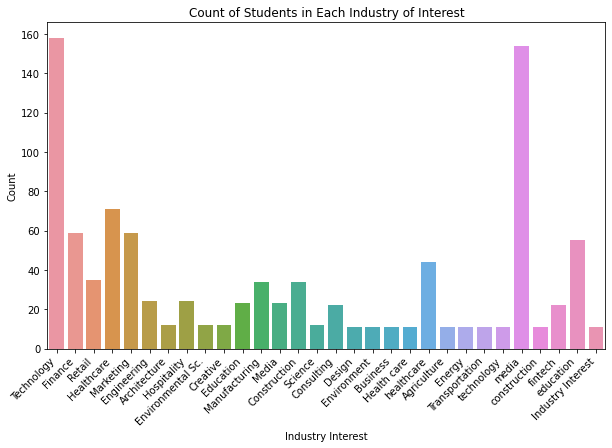

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Industry Interest'])
plt.xlabel('Industry Interest')
plt.ylabel('Count')
plt.title('Count of Students in Each Industry of Interest')
plt.xticks(rotation=45, ha='right')
plt.show()

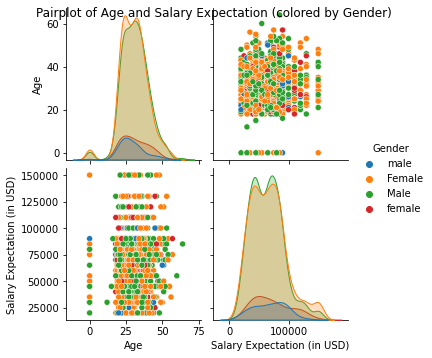

In [15]:
sns.pairplot(data, vars=['Age', 'Salary Expectation (in USD)'], hue='Gender')
plt.suptitle('Pairplot of Age and Salary Expectation (colored by Gender)')
plt.show()

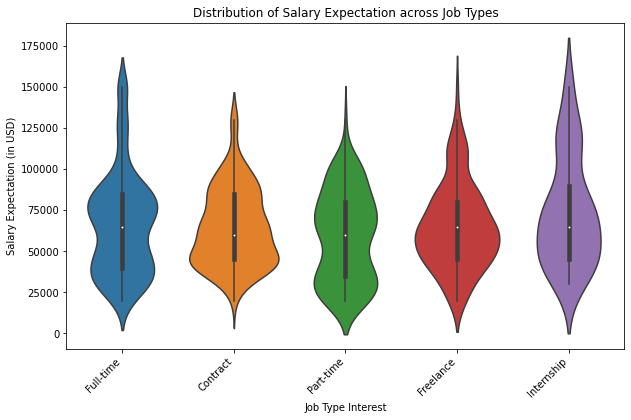

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Job Type Interest', y='Salary Expectation (in USD)', data=data)
plt.xlabel('Job Type Interest')
plt.ylabel('Salary Expectation (in USD)')
plt.title('Distribution of Salary Expectation across Job Types')
plt.xticks(rotation=45, ha='right')
plt.show()

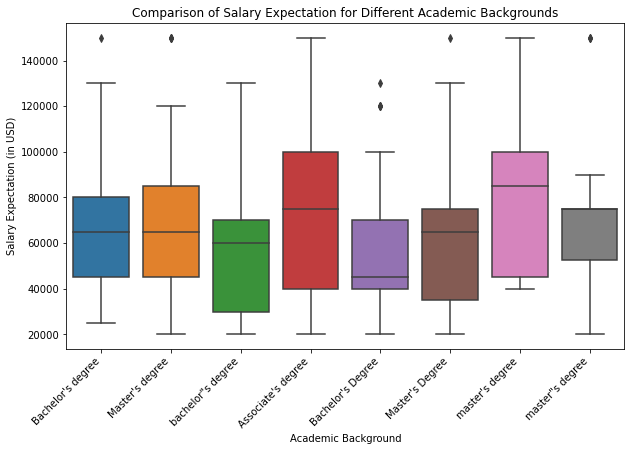

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Academic Background', y='Salary Expectation (in USD)', data=data)
plt.xlabel('Academic Background')
plt.ylabel('Salary Expectation (in USD)')
plt.title('Comparison of Salary Expectation for Different Academic Backgrounds')
plt.xticks(rotation=45, ha='right')
plt.show()

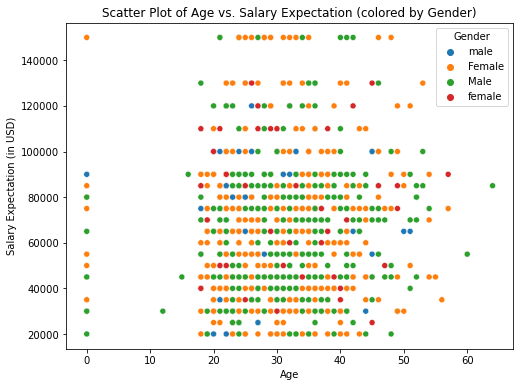

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary Expectation (in USD)', data=data, hue='Gender')
plt.xlabel('Age')
plt.ylabel('Salary Expectation (in USD)')
plt.title('Scatter Plot of Age vs. Salary Expectation (colored by Gender)')
plt.show()

In [19]:
# Method 1: One-Hot Encoding
one_hot_encoded_data = pd.get_dummies(data, columns=['Academic Background', 'Field of Study', 'Industry Interest', 'Job Type Interest', 'Location Interest', 'desired company'], drop_first=True)


label_encoder = LabelEncoder()
data['Gender_encoded'] = label_encoder.fit_transform(data['Gender'])

# Display the encoded datasets
print("One-Hot Encoded Data:")
print(one_hot_encoded_data.head())

print("\nLabel Encoded Data:")
print(data[['Gender', 'Gender_encoded']].head())

One-Hot Encoded Data:
   user ID              Name  Age  Gender  \
0   986206        John Smith   28    male   
1   769632          Jane Doe   42  Female   
2   981314         David Lee   35    Male   
3   962892     Sarah Johnson   27  Female   
4   967782  Michael Williams   46    Male   

                                               Title  \
0                       Google Cloud Program Manager   
1  Supplier Development Engineer (SDE), Cable/Con...   
2  Data Analyst, Product and Tools Operations, Go...   
3            Developer Advocate, Partner Engineering   
4     Program Manager, Audio Visual (AV) Deployments   

                              Minimum Qualifications  \
0  BA/BS degree or equivalent practical experienc...   
1  BS degree in an Engineering discipline or equi...   
2  Bachelorâ€™s degree in Business, Economics, St...   
3  BA/BS degree in Computer Science or equivalent...   
4  BA/BS degree or equivalent practical experienc...   

                                 

In [20]:
# Feature 1: Extracting First Name from Name
data['First Name'] = data['Name'].str.split().str[0]

# Feature 2: Converting 'Age' to Age Group
def get_age_group(age):
    if age < 25:
        return 'Young'
    elif age >= 25 and age < 40:
        return 'Middle-aged'
    else:
        return 'Senior'

data['Age Group'] = data['Age'].apply(get_age_group)

# Feature 3: Counting the number of skills each student has
data['Number of Skills'] = data['Skills'].apply(lambda x: len(x.split(',')))

# Feature 4: Encoding 'Full-time' as 1 and 'Part-time' as 0 for Job Type Interest
data['Job Type Interest'] = data['Job Type Interest'].apply(lambda x: 1 if x == 'Full-time' else 0)

# Feature 5: Encoding 'Male' as 1 and 'Female' as 0 for Gender
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Display the updated dataset with engineered features
print(data.head())

   user ID              Name  Age  Gender  \
0   986206        John Smith   28       0   
1   769632          Jane Doe   42       0   
2   981314         David Lee   35       1   
3   962892     Sarah Johnson   27       0   
4   967782  Michael Williams   46       1   

                                               Title  \
0                       Google Cloud Program Manager   
1  Supplier Development Engineer (SDE), Cable/Con...   
2  Data Analyst, Product and Tools Operations, Go...   
3            Developer Advocate, Partner Engineering   
4     Program Manager, Audio Visual (AV) Deployments   

                              Minimum Qualifications Academic Background  \
0  BA/BS degree or equivalent practical experienc...   Bachelor's degree   
1  BS degree in an Engineering discipline or equi...     Master's degree   
2  Bachelorâ€™s degree in Business, Economics, St...   bachelor"s degree   
3  BA/BS degree in Computer Science or equivalent...  Associate's degree   
4  BA/BS deg

In [21]:
# Prepare the feature matrix X and target vector y
X = data[['Age', 'Gender']]  # Select relevant features
y = data['Job Type Interest']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("KNN Classifier Accuracy:", accuracy)

KNN Classifier Accuracy: 0.535


In [22]:
import tensorflow as tf
# Prepare the feature matrix X and target vector y
X = data[['Age', 'Gender', 'Number of Skills']]  # Select relevant features
y = data['Job Type Interest']  # Target variable

# One-hot encode the target variable for binary classification
y = pd.get_dummies(y, drop_first=True)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data for better training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_class = np.round(y_pred)  # Convert probabilities to binary classes

# Convert predictions back to original class labels for evaluation
y_pred_labels = pd.DataFrame(y_pred_class, columns=y.columns, index=y_test.index)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_labels)
print("Neural Network Accuracy:", accuracy)

Epoch 1/50
20/20 [==============================] - 2s 22ms/step - loss: 0.7083 - accuracy: 0.5133 - val_loss: 0.6927 - val_accuracy: 0.5312
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6954 - accuracy: 0.5336 - val_loss: 0.6951 - val_accuracy: 0.5125
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 0.6898 - accuracy: 0.5227 - val_loss: 0.6992 - val_accuracy: 0.4938
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.5258 - val_loss: 0.7036 - val_accuracy: 0.4938
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6852 - accuracy: 0.5415 - val_loss: 0.7066 - val_accuracy: 0.4313
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.5603 - val_loss: 0.7111 - val_accuracy: 0.4313
Epoch 7/50
20/20 [==============================] - 0s 19ms/step - loss: 0.6832 - accuracy: 0.5618 - val_loss: 0.7133 - val_accuracy: 0.4688
Epoch 8/50
20/20 [

In [23]:
# Import required libraries
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise.accuracy import rmse

# Prepare the data for Surprise library
reader = Reader(rating_scale=(0, 1))
surprise_data = Dataset.load_from_df(data[['user ID', 'Salary Expectation (in USD)', 'Age']], reader)

# Split the data into training and testing sets (80% train, 20% test)
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

# Initialize and train the KNNBasic collaborative filtering model
knn_collaborative = KNNBasic(sim_options={'user_based': True})
knn_collaborative.fit(trainset)

# Make predictions on the test set
predictions = knn_collaborative.test(testset)

# Evaluate the model's performance (Root Mean Squared Error, RMSE)
rmse_score = rmse(predictions)
print("Collaborative Filtering RMSE:", rmse_score)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 31.6624
Collaborative Filtering RMSE: 31.662438314191785


In [24]:
# Import required libraries
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise.accuracy import rmse

# Prepare the data for Surprise library
reader = Reader(rating_scale=(0, 1))
surprise_data = Dataset.load_from_df(data[['user ID', 'Salary Expectation (in USD)', 'Age']], reader)

# Split the data into training and testing sets (80% train, 20% test)
trainset, testset = train_test_split(surprise_data, test_size=0.2, random_state=42)

# Initialize and train the KNNBasic collaborative filtering model
knn_collaborative = KNNBasic(sim_options={'user_based': True})
knn_collaborative.fit(trainset)

# Make predictions on the test set
predictions = knn_collaborative.test(testset)

# Evaluate the model's performance (Root Mean Squared Error, RMSE)
rmse_score = rmse(predictions)
print("Collaborative Filtering RMSE:", rmse_score)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 31.6624
Collaborative Filtering RMSE: 31.662438314191785


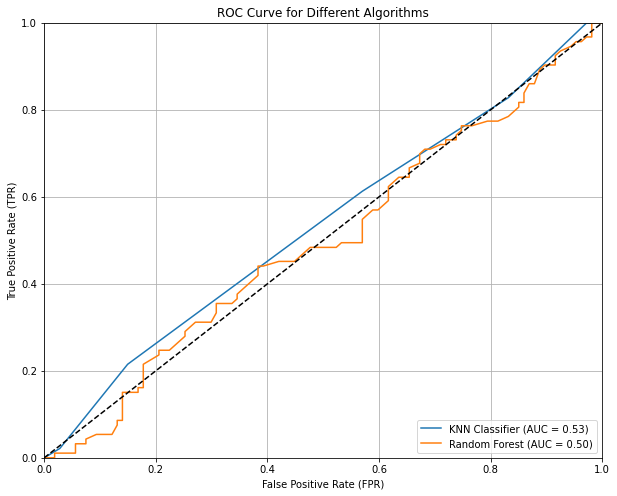

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Prepare the feature matrix X and target vector y
X = data[['Age', 'Gender', 'Number of Skills']]  # Select relevant features
y = data['Job Type Interest']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data for better training performance (not necessary for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models for different algorithms
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Calculate ROC curves and AUC for each model
models = [knn_classifier, rf_classifier]
model_names = ['KNN Classifier', 'Random Forest']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Different Algorithms')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [30]:
accuracy = accuracy_score(y_test, y_pred_prob.round())  # Calculate accuracy using y_pred_prob
report = classification_report(y_test, knn_classifier.predict(X_test_scaled))  # Using the KNN classifier

print(f"--- {name} ---")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("-------------------------------------")

--- Random Forest ---
Accuracy: 0.485
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49       107
           1       0.48      0.61      0.54        93

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200

-------------------------------------


In [31]:
# Get feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
Age: 0.9148342912435319
Gender: 0.026307016004678115
Number of Skills: 0.05885869275179003


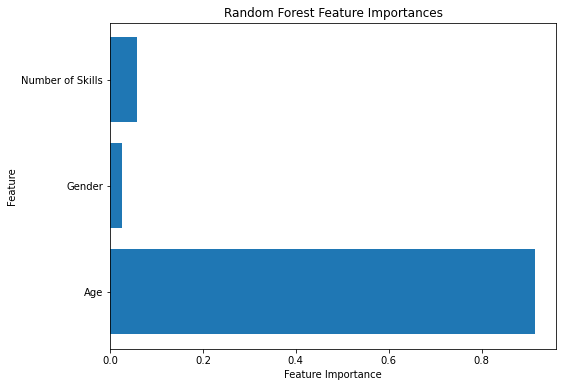

In [32]:
# Get feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Plot feature importances in a bar plot
feature_names = X.columns
plt.figure(figsize=(8, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances')
plt.show()

In [53]:
import joblib
import os

# Create the directory
output_directory = 'student_job_recommendation_system/'
os.makedirs(output_directory, exist_ok=True)

# Convert categorical variables to numerical using one-hot encoding
encoder = OneHotEncoder()
academic_encoded = encoder.fit_transform(academic_data).toarray()

# Scale the data for better clustering performance
scaler = StandardScaler()
academic_scaled = scaler.fit_transform(academic_encoded)

# Save the trained machine learning models
# Assuming you already have the trained models: knn_classifier, knn_collaborative, bayesian_model, model, rf_classifier
joblib.dump(knn_classifier, 'student_job_recommendation_system/knn_classifier_model.pkl')
joblib.dump(rf_classifier, 'student_job_recommendation_system/random_forest_model.pkl')

['student_job_recommendation_system/random_forest_model.pkl']

In [ ]:
# Perform K-Means clustering
num_clusters = 5  # Change this number based on the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(academic_scaled)

# Save the K-Means clustering model
joblib.dump(kmeans, 'student_job_recommendation_system/kmeans_model.pkl')